In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
print('dataset has '+str(dataset.shape[0])+' rows and '+str(dataset.shape[1])+' columns')

dataset has 200 rows and 5 columns


In [4]:
#first five rows of the data
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#dataset info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


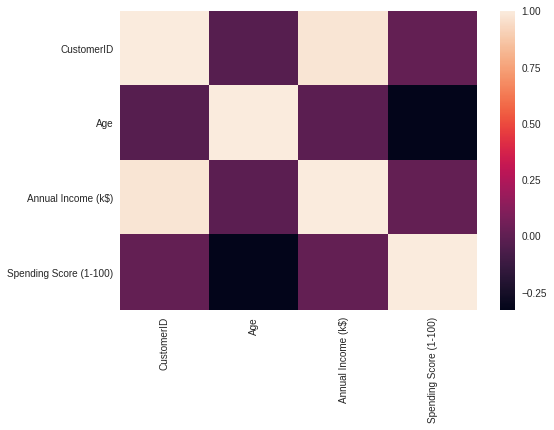

In [6]:
#correlation between the variables
plt.style.use('seaborn')
sns.heatmap(dataset.corr())
plt.show()

In [12]:
#array of X
X = dataset.iloc[:,[3,4]].values

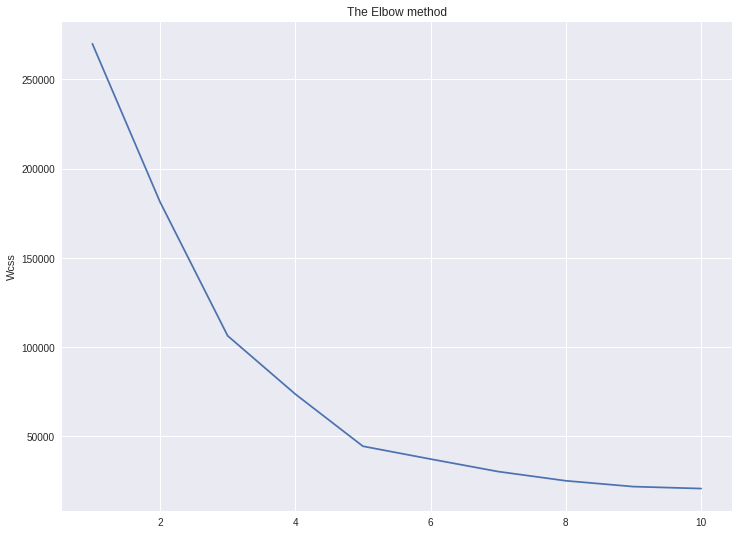

In [14]:
#creating the model of cluster 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.ylabel('Wcss')
plt.show()

In [15]:
#now we initalize the model
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

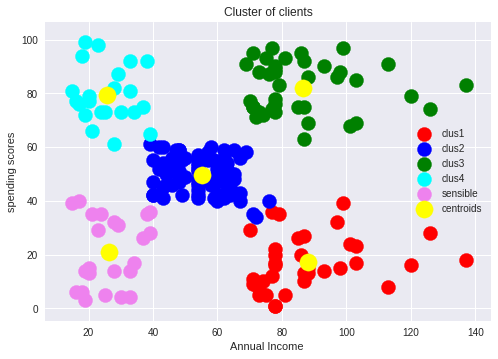

In [33]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=200,c='red',label='clus1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=200,c='blue',label='clus2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=200,c='green',label='clus3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=200,c='cyan',label='clus4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=200,c='violet',label='sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('Cluster of clients')
plt.xlabel('Annual Income ')
plt.ylabel('spending scores')
plt.legend()
plt.show()